# 05.04 분류 성능평가

```

[사이킷런 패키지에서 지원하는 분류 성능평가 명령]

사이킷런 패키지는 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공

confusion_matrix(y_true, y_pred)
accuracy_score(y_true, y_pred)
precision_score(y_true, y_pred)
recall_score(y_true, y_pred)
fbeta_score(y_true, y_pred, beta)
f1_score(y_true, y_pred)
classfication_report(y_true, y_pred)
roc_curve
auc


```

### 1. 분류결과표 (Confusion Matrix)

In [2]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [3]:
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

### 2. 평가점수 (score)

- Accuracy
- Precision
- Recall rate
- Fallout rate
- F-score

```

    classification_report

```

In [4]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [5]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



### 3. ROC커브

- recall 과 fallout score의 비례 상관관계를 보여주는 curve
- threshold가 증가함(높은 기준)에 따라, recall과 fallout score는 일반적으로 함께 떨어지는 모습을 보임

```

판별함수값 계산 : "decision_function" 메서드

ROC 커브 계산 : "from sklearn.metrics import roc_curve"

```

In [15]:
# 판별함수 값, 예측값, 실제값 데이터프레임 생성 ==>> Confusion Matrix, score 생성 목적

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


In [11]:
# Confusion Matrix 생성

confusion_matrix(y, y_hat, labels=[1, 0])

array([[6, 2],
       [1, 7]])

In [12]:
# recall, fallout 계산

recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125


In [9]:
# ROC 커브 계산

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.16762769,  2.16762769,  1.03566193,  0.24472855, -0.06301587,
        -0.87838516, -1.02775912, -4.14855612]))

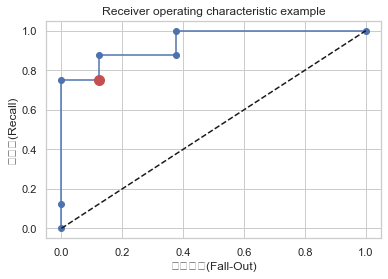

In [14]:
# ROC 커브 시각화

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

### 4. ROC 커브로 보는 모델의 차이

- Confusion Matrix, fallout, recall score 모두 동일해 보여도
- 자세히 보면, ROC커브는 다를 수 있음(미세한 threshold 변화에 따른 recall score는 차이 가능)

In [19]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [20]:
print(confusion_matrix(y, y_hat1))

[[940   3]
 [ 30  27]]


In [21]:
print(confusion_matrix(y, y_hat2))

[[940   3]
 [ 30  27]]


**로지스틱 - SVM모델의 confusion matrix는 같음**

In [22]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [24]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



**하지만, ROC커브를 그려보면, 미세한 성능의 차이를 발견할 수 있음**

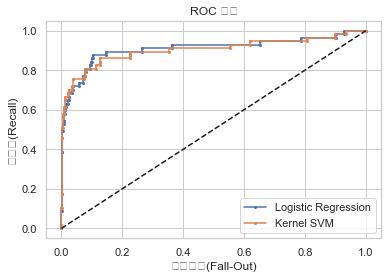

In [25]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()

### 5. AUC

- Area Under the Curve (ROC)
- AUC 값이 클수록(면적이 넓을 수록), 동일한 fallout 대비 높은 recall score로, 모델에 대한 긍정적 신호


In [26]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112016520622872, 0.9037227214377407)